In [105]:
#import dependencies

#Exploratory data analysis tools
import pandas as pd
import numpy as np

#Visualization tools
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline 

# Training machine learning models
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression

#Model Evaluation
from sklearn.metrics import accuracy_score

In [106]:
#Load the data

titanic_df = pd.read_csv('data/train.csv')

In [107]:
titanic_df.head(10)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
5,6,0,3,"Moran, Mr. James",male,NaN,0,0,330877,8.4583,NaN,Q
6,7,0,1,"McCarthy, Mr. Timothy J",male,54.0,0,0,17463,51.8625,E46,S
7,8,0,3,"Palsson, Master. Gosta Leonard",male,2.0,3,1,349909,21.0750,NaN,S
8,9,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",female,27.0,0,2,347742,11.1333,NaN,S
9,10,1,2,"Nasser, Mrs. Nicholas (Adele Achem)",female,14.0,1,0,237736,30.0708,NaN,C


In [108]:
titanic_df.shape

(891, 12)

In [109]:
# basic info about the data
titanic_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [110]:
titanic_df.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [111]:
# check for duplicate data
titanic_df.duplicated().value_counts()

False    891
Name: count, dtype: int64

In [112]:
# sum of missing values in each column in a descending order for test data

titanic_df.isnull().sum().sort_values(ascending = False)

Cabin          687
Age            177
Embarked         2
PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
SibSp            0
Parch            0
Ticket           0
Fare             0
dtype: int64

In [113]:
# handling the missing values
# first, majority of the cabin data are missing so it's best if its entirely dropped

titanic_df = titanic_df.drop(columns='Cabin', axis=1)

In [114]:
# replacing the missing values in 'Age' column with mean value

titanic_df['Age'] = titanic_df['Age'].fillna(titanic_df['Age'].mean())

In [115]:
# finding the mode value of 'Embarked colum'
print(titanic_df['Embarked'].mode()[0])

S


In [116]:
# replacing the missing values in 'Embarked' column with mode values
titanic_df['Embarked'] = titanic_df['Embarked'].fillna(titanic_df['Embarked'].mode()[0])

In [117]:
# sum of missing values in each column in a descending order for test data

titanic_df.isnull().sum().sort_values(ascending = False)

PassengerId    0
Survived       0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Embarked       0
dtype: int64

In [118]:
# statistical measures
titanic_df.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,13.002015,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,22.000000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,29.699118,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,35.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [119]:
titanic_df.Survived.value_counts()

Survived
0    549
1    342
Name: count, dtype: int64

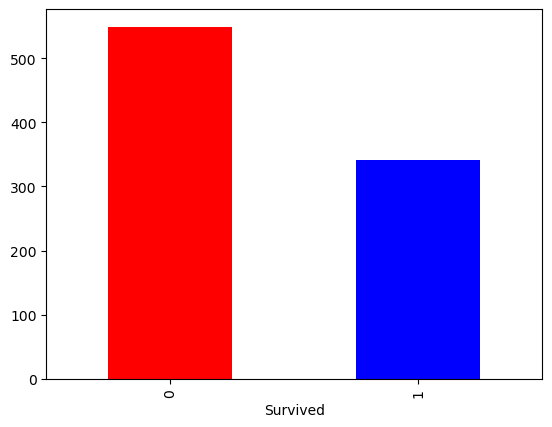

In [120]:
# making a viz for 'Survived' column

titanic_df.Survived.value_counts().plot(kind="bar", color=['red', 'blue']);

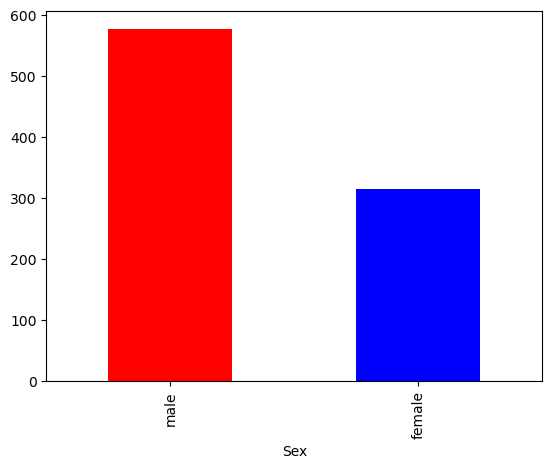

In [121]:
# making a viz for 'Survived' column

titanic_df.Sex.value_counts().plot(kind="bar", color=['red', 'blue']);

In [122]:
# Encoding the categorical columns

print('for sex ', titanic_df['Sex'].value_counts(), 'for embarked ', titanic_df['Embarked'].value_counts())

for sex  Sex
male      577
female    314
Name: count, dtype: int64 for embarked  Embarked
S    646
C    168
Q     77
Name: count, dtype: int64


In [123]:
titanic_df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,S


In [124]:
#converting the columns
titanic_df.replace({'Sex': {'male':1, 'female':0}, 'Embarked':{'S':1, 'C':0, 'Q':2}}, inplace=True)

C:\Users\USER\AppData\Local\Temp\ipykernel_23544\2221082158.py:2: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  titanic_df.replace({'Sex': {'male':1, 'female':0}, 'Embarked':{'S':1, 'C':0, 'Q':2}}, inplace=True)


In [125]:
titanic_df.info()
titanic_df.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    int64  
 5   Age          891 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Embarked     891 non-null    int64  
dtypes: float64(2), int64(7), object(2)
memory usage: 76.7+ KB


,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",1,22.0,1,0,A/5 21171,7.2500,1
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",0,38.0,1,0,PC 17599,71.2833,0
2,3,1,3,"Heikkinen, Miss. Laina",0,26.0,0,0,STON/O2. 3101282,7.9250,1
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",0,35.0,1,0,113803,53.1000,1
4,5,0,3,"Allen, Mr. William Henry",1,35.0,0,0,373450,8.0500,1


In [126]:
# seerating features and target
X = titanic_df.drop(columns=['PassengerId', 'Name', 'Ticket', 'Survived'], axis=1)
Y = titanic_df.Survived

In [127]:
X

,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,3,1,22.000000,1,0,7.2500,1
1,1,0,38.000000,1,0,71.2833,0
2,3,0,26.000000,0,0,7.9250,1
3,1,0,35.000000,1,0,53.1000,1
4,3,1,35.000000,0,0,8.0500,1
...,...,...,...,...,...,...,...
886,2,1,27.000000,0,0,13.0000,1
887,1,0,19.000000,0,0,30.0000,1
888,3,0,29.699118,1,2,23.4500,1
889,1,1,26.000000,0,0,30.0000,0


In [128]:
Y

0      0
1      1
2      1
3      1
4      0
      ..
886    0
887    1
888    0
889    1
890    0
Name: Survived, Length: 891, dtype: int64

In [129]:
#Splitting data
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=2)

In [130]:
print(X.shape, X_train.shape, X_test.shape)

(891, 7) (712, 7) (179, 7)


In [131]:
model = LogisticRegression()

In [132]:
model.fit(X_train, Y_train)

c:\Users\USER\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [133]:
#model Evaluation 
# Accuracy on training data

X_train_pred = model.predict(X_train)
training_data_accuracy = accuracy_score(X_train_pred, Y_train)
print('The Accuracy on training data : ' , training_data_accuracy)

The Accuracy on training data :  0.8089887640449438


In [134]:
#Accuracy on test data
X_test_pred = model.predict(X_test)
test_data_accuracy = accuracy_score(X_test_pred, Y_test)
print('The Accuracy on test data: ', test_data_accuracy)

The Accuracy on test data:  0.770949720670391
